In [2]:
import pandas as pd
usertags = pd.read_csv('all_user_tags.csv').iloc[:,2:]

In [2]:
usertags.iloc[1].app_key.strip('[]').replace("'","").replace("\n",'').split(" ")

['b773cf8ac947e5c77ffbb4f661c1e32cc21a86a7',
 '97fa2c49da35ccbd167753ad64ad2b3d26e40e6c',
 'affe7720c5c474142003e6d8bd540e2538d601be',
 '88a6b5c1a3a1a3506d9979588a8d61d629858a36',
 '7f5736a8ec8eb6dad3e996ae7b8a219e644ef0c3']

In [3]:
import numpy as np
# 标记上的标签可能有格式不标准的地方，标准化格式方便后面操作
def standardization(x):
    return x.app_key.strip('[]').replace("'","").replace("\n",'').split(" ")

usertags['std_features'] = usertags.apply(standardization,axis = 1)

In [4]:
#建标签字典
cate = pd.read_excel('category.xlsx')
need = cate.dropna().iloc[:,1:3]
need.columns = ['key','category']
dic = need.set_index('key').T.to_dict('list')

def assign_feature(user):
    tags = user.std_features
    raw = []
    for tag in tags:
        feature = dic.get(tag)
        raw.append(feature)
    final = list(filter(None,raw))
    return final

usertags['category'] = usertags.apply(assign_feature,axis = 1)

In [5]:

def standardization2(x):
    return str(x).replace('[','').replace(']','').replace(",",' ').replace("'",'').replace('  ',' ').split(' ')

usertags['std_category'] = usertags.category.apply(standardization2)
usertags['std_category'] = usertags.std_category.apply(np.unique)


In [7]:
useful = usertags.std_category

In [8]:
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

x=list(itertools.chain.from_iterable(useful))
y=dict(Counter(x))
z = pd.DataFrame.from_dict(y, orient='index').reset_index()
z.columns = ['标签','用户数']


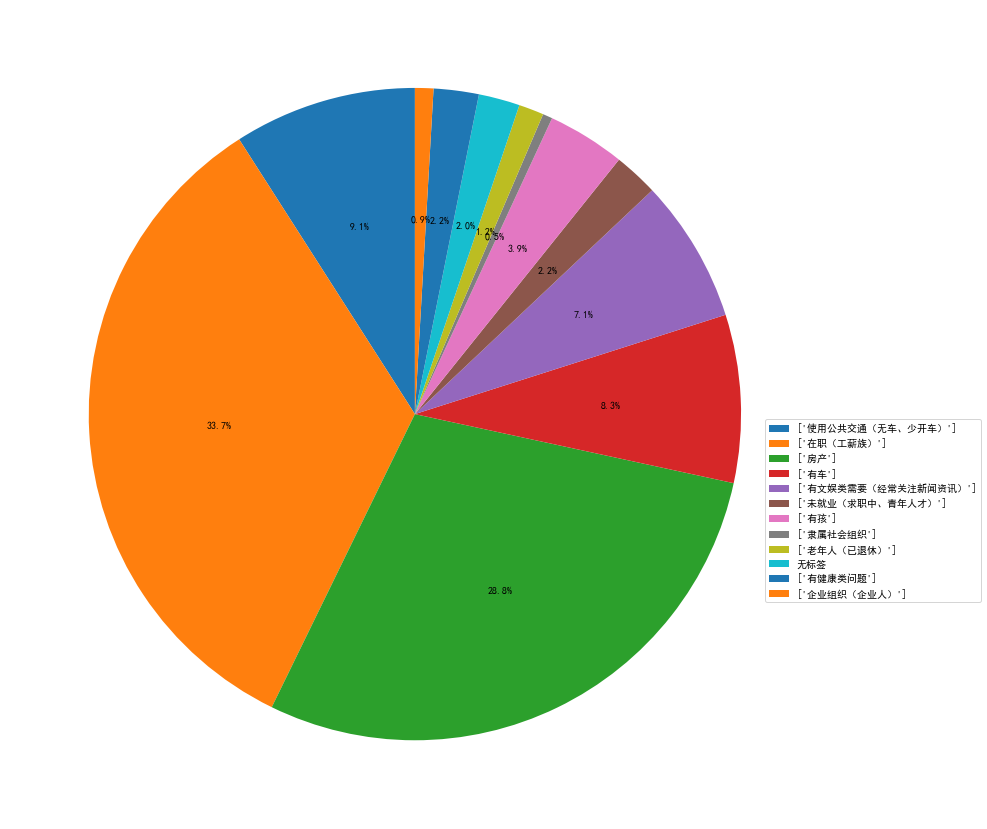

In [9]:
names = pd.read_excel('keys.xlsx')
invdic = names.set_index('标签数字').T.to_dict('list')

def get_tagname(tagnumber):
    if tagnumber !='':
        return invdic.get(int(tagnumber))
    else:
        return '无标签'

z['标签名字'] = z.标签.apply(get_tagname)

fig1 = plt.figure(1,figsize = (15,15))
patches, l_text, p_text = plt.pie(z.用户数, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.legend(labels = z.标签名字,loc = 'upper right',bbox_to_anchor = (1.2, 0.5))

